In [9]:
import pandas as pd
from sklearn.datasets import load_digits
import numpy as np

In [2]:
datasets= load_digits()

In [3]:
dir(datasets)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
datasets.data.shape

(1797, 64)

In [5]:
df=pd.DataFrame(datasets.data,columns=datasets.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


<Figure size 640x480 with 0 Axes>

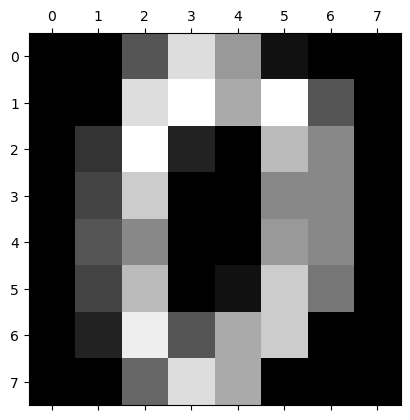

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray() # gray color
plt.matshow(datasets.data[0].reshape(8,8)) # matshow is matric show

<Figure size 640x480 with 0 Axes>

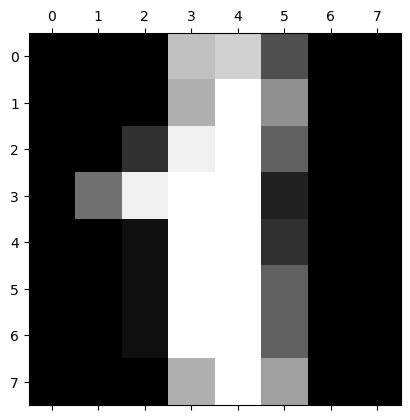

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray() # gray color
plt.matshow(datasets.data[1].reshape(8,8)) # matshow is matric show

In [10]:
np.unique(datasets.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
X=df
y=datasets.target

# Scaling the values for X and y variable

In [15]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.2,random_state=30)

In [20]:
len(y_test)

360

In [21]:
.2*len(y_test)

72.0

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
model.score(X_test,y_test)

0.9722222222222222

# Principal Component Analysis to reduce dimensions- features

In [27]:
from sklearn.decomposition import PCA
pca= PCA(.95) # retain 95% of the true features

In [28]:
X_pca=pca.fit_transform(X)

In [30]:
X_pca.shape

(1797, 29)

# the features have reduced from 64 to 29

In [31]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [32]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

# it shows pca1 has retained 14% of the useful information from the first column of the dataset. Similarly, pca2 and others

In [34]:
pca.n_components_

29

In [37]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca,y,test_size=.2,random_state=30)

In [40]:
model = LogisticRegression(max_iter=1000) # to do max iterations to avoid warnings
model.fit(X_pca_train,y_pca_train)

LogisticRegression(max_iter=1000)

In [41]:
model.score(X_pca_test,y_pca_test)

0.9694444444444444

# To get first computation we can mention pca_components = 2, but accuracy will hamper

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [43]:
X_pca

array([[ -1.25946609,  21.27488401],
       [  7.95760979, -20.76870104],
       [  6.99192334,  -9.95598668],
       ...,
       [ 10.80128419,  -6.96025129],
       [ -4.87210079,  12.42395035],
       [ -0.34438797,   6.36555238]])

In [44]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [45]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

We get less accuancy (~60%) as using only 2 components did not retain much of the feature information. However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy